# Análises COVID-19 | COVID-19 analysis

## Digital Innovation One

### Adapted from Prof. Dr. Neylson Crepalde notebook

Vamos analisar as séries temporais sobre a contaminação do vírus COVID-19 pelo mundo.

We'll analyse COVID-19 growth rate time series around the world.

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

Agora, vamos importar os dados. É importante já dizer no comando `pd.read_csv` quais são as colunas que serão "parseadas" como datas. O pandas possui métodos robustos para trabalhar com esse tipo de informação.

First, import the data. It's important specify date columns we want to parse, so pandas can convert the text to datetype format and make easyer to handle.Pandas's 'read_csv' function has a speciall parameter for this task.

In [35]:
# url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'
# df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])

df = pd.read_csv('./data/covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


Agora, vamos conferir os tipos das variáveis para verificar que as colunas foram corretamente importadas.

In [36]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos utilizar uma função para corrigir os nomes das colunas.
Columns names shoudn't contains uppercase letters neither special characteres. We'll use a function to correct them.

In [37]:
import re
def format_col_names(col_name: str) -> str:
    # return re.sub(r"[/| ]", "_", col_name).lower()
    col_name = col_name.replace('/','_or_')
    col_name = col_name.replace(' ','_')
    return re.sub(r'([a-z])([A-Z])',r'\1_\2',col_name).lower()

In [38]:
df.columns = [format_col_names(col) for col in df.columns]
df.head(3)


,sno,observation_date,province_or_state,country_or_region,last_update,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


## Análises / Analysis

Show! Agora vamos começar a investigar as variáveis que temos à disposição. Sabemos que trata-se de séries temporais que estão divididas por estado. Para fazer qualquer análise, portanto, precisamos dividir os nossos dados esse "grão". 

Vamos verificar primeiro quantos estados temos informações para o Brasil.

Great! Now lets start investigating our variables. The time series are sorted by state. First, lets subset our data just for Brasil.

In [39]:
df.loc[df.country_or_region == 'Brazil']

,sno,observation_date,province_or_state,country_or_region,last_update,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


Opa. No caso do Brasil, não temos informação a nível de estado, apenas a nível do país. Ok, então. Vamos verificar como está o comportamento dos casos confirmados no Brasil desde o primeiro caso confirmado, 26 de fevereiro.

For Brasil, we don't have information about states, just the country. Let's check the numbers since February 26th.

## Casos confirmados / Positives

In [40]:
brasil = df.loc[(df.country_or_region == 'Brazil') & (df.confirmed > 0)]

In [41]:
px.line?

Signature:
px.line(
    data_frame=None,
    x=None,
    y=None,
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    symbol_map=None,
    markers=False,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    line_shape=None,
    render_mode='auto',
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a 2D line plot, each row of `data_frame` i

In [42]:
px.line(brasil, 'observation_date', 'confirmed', 
        labels={'observation_date':'Data/Date', 'confirmed':'Número de casos confirmados/Number of positive cases'},
       title='Casos confirmados no Brasil / Positive cases in Brasil')

## Número de novos casos por dia / Daily growth of positive cases

In [43]:
# Vamos implementar uma função para fazer a contagem de novos casos
brasil['new_cases'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

C:\Users\IgorF\AppData\Local\Temp\ipykernel_6284\3323552516.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
# Visualizando
px.line(brasil, x='observation_date', y='new_cases', title='Novos casos por dia/New daily cases',
       labels={'observation_date': 'Data/Date', 'new_cases': 'Novos casos/New cases'})

O número de novos casos parece ser um excelente caso para modelagem. Será que conseguimos predizer quando o número de novos casos vai começar a cair?
The number of new daily cases are great for this model. Could we predict when it'll start to fall?

## Mortes / Deaths

In [45]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observation_date, y=brasil.deaths, name='Mortes/Deaths', mode='lines+markers',
              line=dict(color='red'))
)
#Edita o layout
fig.update_layout(title='Mortes por COVID-19 no Brasil/ Deaths by COVID-19 in Brasil',
                   xaxis_title='Data/Date',
                   yaxis_title='Número de mortes/Number of deaths')
fig.show()

# Taxa de crescimento / Growth rate

Vamos calcular a taxa de crescimento do COVID desde o primeiro caso.

Let's calculate COVID's growth rate from the first case.

In [46]:
def growth_rate(data, variable, start_date=None, end_date=None):
    # Se start_date for None, define como a primeira data disponível no dataset
    if start_date == None:
        start_date = data.observation_date.loc[data[variable] > 0].min()
    else:
        start_date = pd.to_datetime(start_date)
        
    if end_date == None:
        end_date = data.observation_date.iloc[-1]
    else:
        end_date = pd.to_datetime(end_date)
    
    # Define os valores de presente e passado
    past = data.loc[data.observation_date == start_date, variable].values[0]
    present = data.loc[data.observation_date == end_date, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (end_date - start_date).days
    
    # Calcula a taxa
    rate = (present/past)**(1/n) - 1

    return rate*100

In [47]:
mean_growth_rate = growth_rate(brasil, 'confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {mean_growth_rate.round(2)}%.")
print(f"The mean growth rate of the number of positive COVID cases in Brasil was {mean_growth_rate.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 16.27%.
The mean growth rate of the number of positive COVID cases in Brasil was 16.27%.


Agora, vamos observar o comportamento da **taxa de crescimento no tempo**. Para isso, vamos definir uma função para calcular a taxa de crescimento diária.

Now, watch the growth rate behavior by time. We'll use a new function to get daily growth rate. 

In [48]:
def daily_growth_rate(data, variable, start_date=None):
    if start_date == None:
        start_date = data.observation_date.loc[data[variable] > 0].min()
    else:
        start_date = pd.to_datetime(start_date)
        
    end_date = data.observation_date.max()
    n = (end_date - start_date).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [49]:
daily_rate = daily_growth_rate(brasil, 'confirmed')

In [50]:
daily_rate

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [51]:
first_day = brasil.observation_date.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(first_day, brasil.observation_date.max())[1:],
        y=daily_rate, title='Taxa de crescimento de casos confirmados no Brasil/Daily growth rate cases in Brasil',
       labels={'y':'Taxa de crescimento/Growth rate', 'x':'Data/Date'})

# Predições / Predictions

Vamos construir um modelo de séries temporais para prever os novos casos. Antes analisemos a série temporal.

Lets make a time series model to predict the number of new cases. Before that, pay attention to the time serie.

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

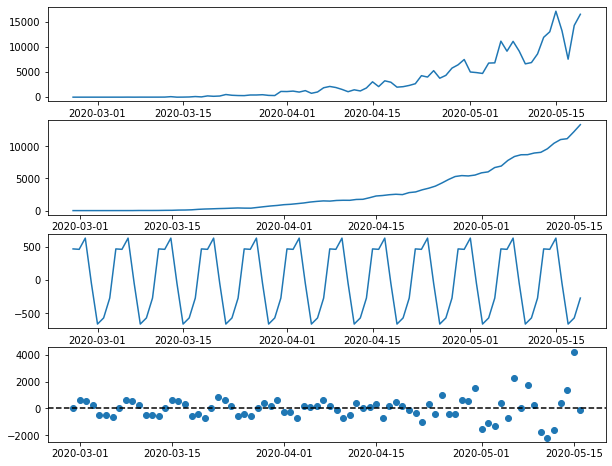

In [53]:
new_cases = brasil.new_cases
new_cases.index = brasil.observation_date

decomposed = seasonal_decompose(new_cases)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(decomposed.observed)
ax2.plot(decomposed.trend)
ax3.plot(decomposed.seasonal)
ax4.scatter(new_cases.index, decomposed.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

## Decompondo a série de confirmados / Subseting positives



In [54]:
positives = brasil.confirmed
positives.index = brasil.observation_date

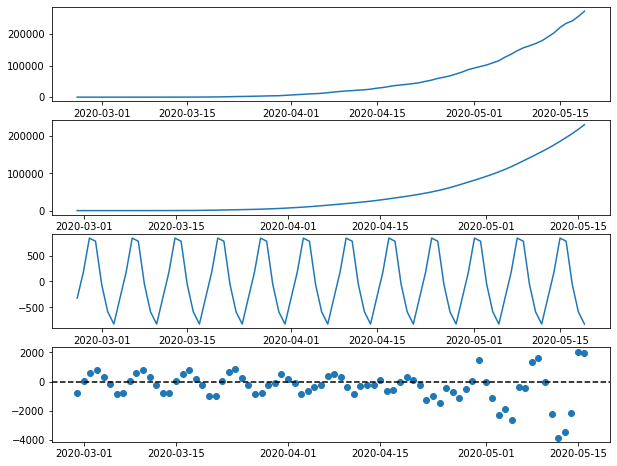

In [55]:
positive_decomposed = seasonal_decompose(positives)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(positive_decomposed.observed)
ax2.plot(positive_decomposed.trend)
ax3.plot(positive_decomposed.seasonal)
ax4.scatter(positives.index, positive_decomposed.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Predizendo o número de casos confirmados com um AUTO-ARIMA / Predict number of positives cases with AUTO-ARIMA

In [56]:
#!pip install pmdarima

In [57]:
from pmdarima.arima import auto_arima

In [58]:
model = auto_arima(positives)

In [59]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

In [60]:
forecasted_time = pd.date_range('2020-05-20', '2020-06-05')

fig = go.Figure(go.Scatter(
    x=positives.index, y=positives, name='Observed'
))

fig.add_trace(go.Scatter(x=positives.index, y = model.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=forecasted_time, y=model.predict(15), name='Forecast'))

fig.update_layout(title='Previsão de casos positives para os próximos 15 dias/Next 15 days positive cases forecast.',
                 yaxis_title='Casos positives/Positives cases', xaxis_title='Data/Date')
fig.show()